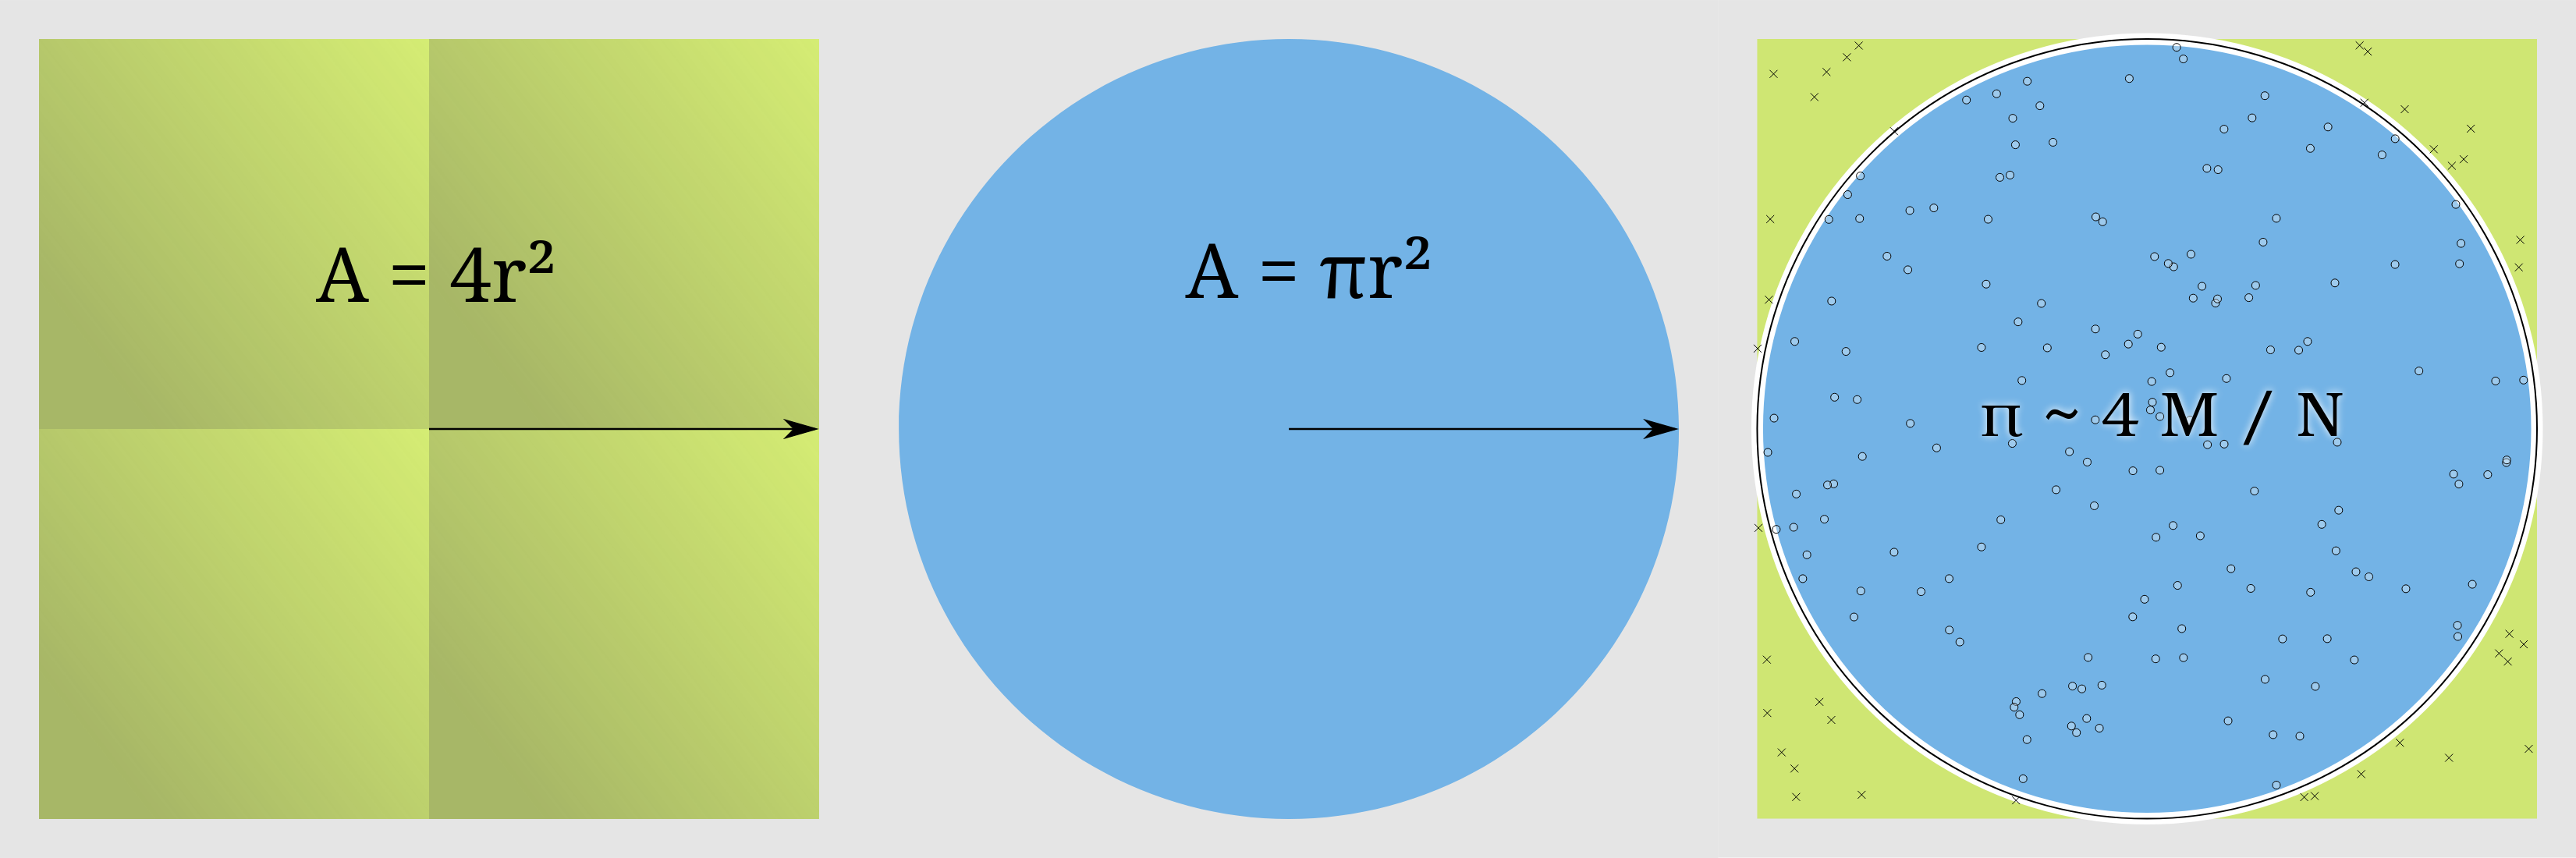

In [1]:
import random

In [2]:
random.uniform(-1, 1)

-0.23955800777301062

In [64]:
def calc_pi(N):
    M = 0
    for i in range(N):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        dist = x**2 + y**2
        if dist < 1:
            M += 1
    return 4*M/N

In [65]:
calc_pi(10**6)

3.14234

In [66]:
%timeit calc_pi(10**6)

589 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
import numpy as np

In [8]:
def calc_pi_numpy(N):
    x = np.random.uniform(-1,1, N)
    y = np.random.uniform(-1,1, N)
    dist = x**2 + y**2
    M = np.where(dist<1, 1, 0).sum()
    return 4 * M/N

In [9]:
calc_pi_numpy(10**6)

3.14218

In [16]:
%timeit calc_pi_numpy(10**8)

2.39 s ± 33.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
speedup_factor = 615/27.9
speedup_factor

22.043010752688172

In [13]:
import dask.array as da

def calc_pi_dask(N):
    x = da.random.uniform(-1,1, N)
    y = da.random.uniform(-1,1, N)
    dist = x**2 + y**2
    M = da.where(dist<1, 1, 0).sum()
    return 4 * M/N

In [14]:
calc_pi_dask(10**6).compute()

3.142144

In [55]:
%timeit calc_pi_dask(10**8).compute()

968 ms ± 28.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
2390/1010

2.366336633663366

In [24]:
%timeit sum(range(10**7))

157 ms ± 6.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%timeit np.arange(10**7).sum()

16.6 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
import numba

In [37]:
def sum_range(N):
    sum  = 0
    for i in range(N):
        sum += i
    return sum

In [41]:
sum_range_numba = numba.jit(sum_range)

In [54]:
sum_range(3.1**7)

TypeError: 'float' object cannot be interpreted as an integer

In [49]:
speedup_factor = 157/.000169
speedup_factor

928994.0828402367

In [71]:
calc_pi_numba = numba.jit(nogil = True)(calc_pi)

## OR

In [72]:
@numba.jit(nogil = True)
def calc_pi(N):
    M = 0
    for i in range(N):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        dist = x**2 + y**2
        if dist < 1:
            M += 1
    return 4*M/N

In [59]:
%timeit calc_pi_numba(10**8)

922 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
from threading import Thread

In [78]:
%%timeit
N = 10**8

t1 = Thread(target = calc_pi_numba, args = (N, ))
t2 = Thread(target = calc_pi_numba, args = (N, ))
t3 = Thread(target = calc_pi_numba, args = (N, ))
# t4 = Thread(target = calc_pi_numba, args = (N, ))

t1.start()
t2.start()
t3.start()
# t4.start()

t1.join()
t2.join()
t3.join()
# t4.join()

970 ms ± 19.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Python's Global Interpreter Lock (GIL). Why?

some_list = [1, 3, 8]

def modify_list(a_list):
    a_list[1] = 0
    
def modification_of_list(list)
    list[1] = 2
    

In [82]:
N = 10**7
rnd_numbers = np.random.random(N)
rnd_numbers

array([0.7243756 , 0.84358614, 0.28251788, ..., 0.15811873, 0.98829676,
       0.16202232])

In [84]:
%timeit np.sort(rnd_numbers)

877 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
N = 10**7
rnd1 = np.random.random(N)
rnd2 = np.random.random(N)
rnd3 = np.random.random(N)

In [86]:
%%timeit
N = 10**8

t1 = Thread(target = np.sort, args = (rnd1, ))
t2 = Thread(target = np.sort, args = (rnd2, ))
t3 = Thread(target = np.sort, args = (rnd3, ))
# t4 = Thread(target = calc_pi_numba, args = (N, ))

t1.start()
t2.start()
t3.start()
# t4.start()

t1.join()
t2.join()
t3.join()

924 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
from multiprocessing import Process

In [91]:
%%timeit
if __name__ == "__main__":
    p1 = Process(target = calc_pi_numpy, args = (N, ))
    p2 = Process(target = calc_pi_numpy, args = (N, ))
    p3 = Process(target = calc_pi_numpy, args = (N, ))
    # t4 = Thread(target = calc_pi_numba, args = (N, ))

    p1.start()
    p2.start()
    p3.start()
    # t4.start()

    p1.join()
    p2.join()
    p3.join()    

358 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
from 